# Exercise Sheet3 : PCA: batch preprocessing and online-PCA
Machine Intelligence 2

SS 2017, Obermayer/Augustin/Guo

Group: Outlaws (Muhammed Cengizhan Özmen, Zhanwang Chen, Sedat Koca, Huajun Li, Khaled Mansour)

In [5]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tools.plotting import scatter_matrix
from numpy import *

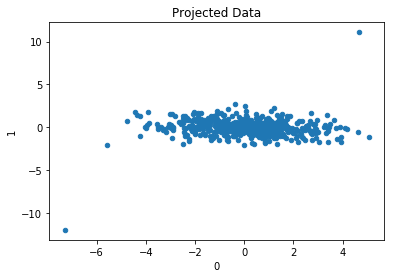

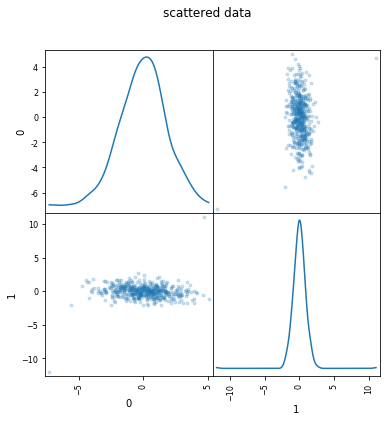

In [7]:
#Task 3.1
pca2= pd.read_csv('pca2.csv')
#center the data
pca2_centered=pca2-np.mean(pca2)
#covariance
pca2_cov=pca2_centered.cov()
#Eigen value and eigen vector
eig_val,eig_vec=np.linalg.eig(pca2_cov)
#projection of data from pca2d_centered.dot with eigen vector
pca2_proj=pca2_centered.dot(eig_vec)
#PCA
pca2_1PC=np.matrix(pca2_proj[0]).T
pca2_2PC=np.matrix(pca2_proj[1]).T

pca2_proj.plot(kind='scatter',x=0,y=1, title='Projected Data')
scatter=scatter_matrix(pca2_proj,alpha=0.2,figsize=(6,6),diagonal='kde')
plt.suptitle('scattered data')
plt.show()

[  0.  13.] [  0. -13.]


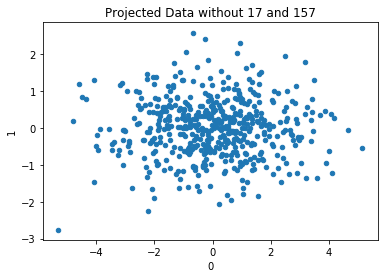

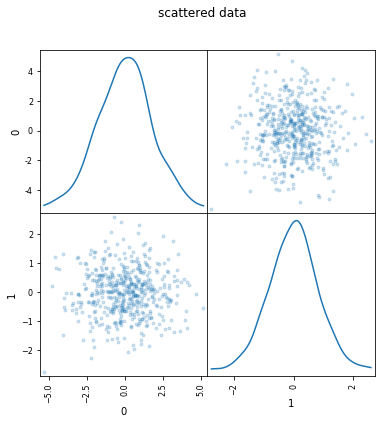

In [141]:
#Task 3.1.b
#Task 3.1
pca2= pd.read_csv('pca2.csv')
#convert to numpy
pca2mat=pca2.values
print(pca2mat[16],pca2mat[156])
pca2n=pca2.drop(16)
pca2n=pca2n.drop(156)

#copy from task a
#center the data
pca2n_centered=pca2n-np.mean(pca2n)
#covariance
pca2n_cov=pca2n_centered.cov()
#Eigen value and eigen vector
eig_val,eig_vec=np.linalg.eig(pca2n_cov)
#projection of data from pca2d_centered.dot with eigen vector
pca2n_proj=pca2n_centered.dot(eig_vec)
#PCA
pca2n_1PC=np.matrix(pca2n_proj[0]).T
pca2n_2PC=np.matrix(pca2n_proj[1]).T

pca2n_proj.plot(kind='scatter',x=0,y=1, title='Projected Data without 17 and 157')
scatter=scatter_matrix(pca2n_proj,alpha=0.2,figsize=(6,6),diagonal='kde')
plt.suptitle('scattered data')
plt.show()


Our Observation?¶
First: The data are directed and correlated.
Second: The outlier's influence the distribution of the printed data and the distribution of the date points between the outlier's is compressed.

After removing the Observation 17 and 157, which are actually the "unexpected" noisy data points from the original dataset, the data points from the latter are more centrally distributed in a relatively smaller area.

## 3.2 *Whitening*
(a) Load the dataset pca4.csv and check for outliers in the individual variables.
(b) Do PCA on a reasonable subset of this data. Use a scree plot to determine how many PCs
represent the data well.
(c) “Whiten” the data, i.e. create a set of 4 uncorrelated variables with mean 0 and standard
deviation equal to 1. This can be done e.g. using the transformation
Z = XEΛ ˜ −1/2
.
The new variables zi form the columns of Z, E is a matrix containing in its columns the normalized
eigenvectors of the covariance matrix C of the centered data X˜ (variables columnwise)
and Λ is a diagonal matrix containing the corresponding eigenvalues.
(d) Make 3 heat plots of the (i) 4x4 covariance matrix C, (ii) the covariance matrix of the data
projected onto PC1-PC4, and (iii) of the whitened variables.

In [12]:
# a)

# Load the dataset pca4.csv
pca4 = np.genfromtxt('Data/pca4.csv', delimiter=',', skip_header=1)
#print "pca4 shape:", pca4.shape

def reject_outliers(data, m=5):
    D = np.matrix(data)
    if(D.shape[0]==1):
        D = D.T
    # create filter
    filter = abs(D - np.mean(D)) < m * np.std(D)
    number_true_data = np.sum(filter,axis=0)
    filter_prod = np.all(filter, axis=1)
    # return filtered data
    return D[np.matrix(range(D.shape[0])).T[filter_prod].tolist()], number_true_data

# reject outliers
pca4_clean, number_true_data = reject_outliers(pca4)
#print "pca4_clean shape:", pca4_clean.shape, "\n"

# check for outliers in the individual variables
for feature in range(4):
    num_outliers = pca4[:,feature].shape[0] - number_true_data[0,feature]
    print "X" + str(feature+1), "has", num_outliers, "outliers"
    
# show data
fig = plt.figure()
plt.scatter(pca4[:,0], np.ones(pca4.shape[0])*4, c='g')
plt.scatter(pca4[:,1], np.ones(pca4.shape[0])*3, c='b')
plt.scatter(pca4[:,2], np.ones(pca4.shape[0])*2, c='r')
plt.scatter(pca4[:,3], np.ones(pca4.shape[0])*1, c='y')
plt.title("pca4")
plt.xlabel("value")
plt.legend(["X1", "X2", "X3", "X4"])
cur_axes = fig.gca()
cur_axes.axes.get_yaxis().set_visible(False)
plt.show()

# show data
fig = plt.figure()
plt.scatter(pca4_clean[:,0], np.ones(pca4_clean.shape[0])*4, c='g')
plt.scatter(pca4_clean[:,1], np.ones(pca4_clean.shape[0])*3, c='b')
plt.scatter(pca4_clean[:,2], np.ones(pca4_clean.shape[0])*2, c='r')
plt.scatter(pca4_clean[:,3], np.ones(pca4_clean.shape[0])*1, c='y')
plt.title("pca4_clean")
plt.xlabel("value")
plt.legend(["X1", "X2", "X3", "X4"])
cur_axes = fig.gca()
cur_axes.axes.get_yaxis().set_visible(False)
plt.show()

SyntaxError: invalid syntax (<ipython-input-12-912698f93bf5>, line 25)

In [9]:
# b) Do PCA on a reasonable subset of this data.

# standardize
pca4_clean_std = StandardScaler().fit_transform(pca4_clean)

# show data
fig = plt.figure()
plt.scatter(pca4_clean_std[:,0], np.ones(pca4_clean_std.shape[0])*4, c='g')
plt.scatter(pca4_clean_std[:,1], np.ones(pca4_clean_std.shape[0])*3, c='b')
plt.scatter(pca4_clean_std[:,2], np.ones(pca4_clean_std.shape[0])*2, c='r')
plt.scatter(pca4_clean_std[:,3], np.ones(pca4_clean_std.shape[0])*1, c='y')
plt.title("pca4_clean_std")
plt.xlabel("value")
plt.legend(["X1", "X2", "X3", "X4"])
cur_axes = fig.gca()
cur_axes.axes.get_yaxis().set_visible(False)
plt.show()

# Compute the Principal Components
cov_mat = np.cov(pca4_clean_std, rowvar=False)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Sort by eig_vals
sort_index = np.flipud(np.argsort(eig_vals))
eig_vals_sort = eig_vals[sort_index]
eig_vecs_sort = eig_vecs[sort_index]

# Use a scree plot to determine how many PCs represent the data well.
plt.plot(range(1,len(eig_vals_sort)+1), eig_vals_sort, 'ro-', linewidth=2)
plt.title('Scree Plot of PCs')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

NameError: name 'StandardScaler' is not defined

In [4]:
# c)

# whitening
D = np.diag(1. / np.sqrt(eig_vals))
W = np.dot(np.dot(eig_vecs, D), eig_vecs.T)
pca4_whitened = np.dot(pca4_clean_std, W)

# show data
fig = plt.figure()
plt.scatter(pca4_whitened[:,0], np.ones(pca4_whitened.shape[0])*4, c='g')
plt.scatter(pca4_whitened[:,1], np.ones(pca4_whitened.shape[0])*3, c='b')
plt.scatter(pca4_whitened[:,2], np.ones(pca4_whitened.shape[0])*2, c='r')
plt.scatter(pca4_whitened[:,3], np.ones(pca4_whitened.shape[0])*1, c='y')
plt.title("pca4_whitened")
plt.xlabel("value")
plt.legend(["X1", "X2", "X3", "X4"])
cur_axes = fig.gca()
cur_axes.axes.get_yaxis().set_visible(False)
plt.show()

NameError: name 'np' is not defined

In [ ]:
# d)

# heat plot of the 4x4 covariance matrix
plt.pcolor(cov_mat)
plt.title("Covariance Matrix")
plt.show()

# heat plot of the covariance matrix projected onto PC1-PC4
plt.pcolor(np.dot(cov_mat, eig_vecs))
plt.title("Covariance Matrix Projected onto PC1-PC4")
plt.show()

# heat plot of whitened variables
plt.pcolor(np.cov(pca4_whitened, rowvar=False))
plt.title("Whitened Variables")
plt.show()

   As can be observed from the plotting above, the difference between the Taylor-expanding of right side of the equation and the one from Oja's rule is nearly zero when the learning_rate is a small value around 0.
   So the Oja's rule is the one that neglecting terms of second or higher order.

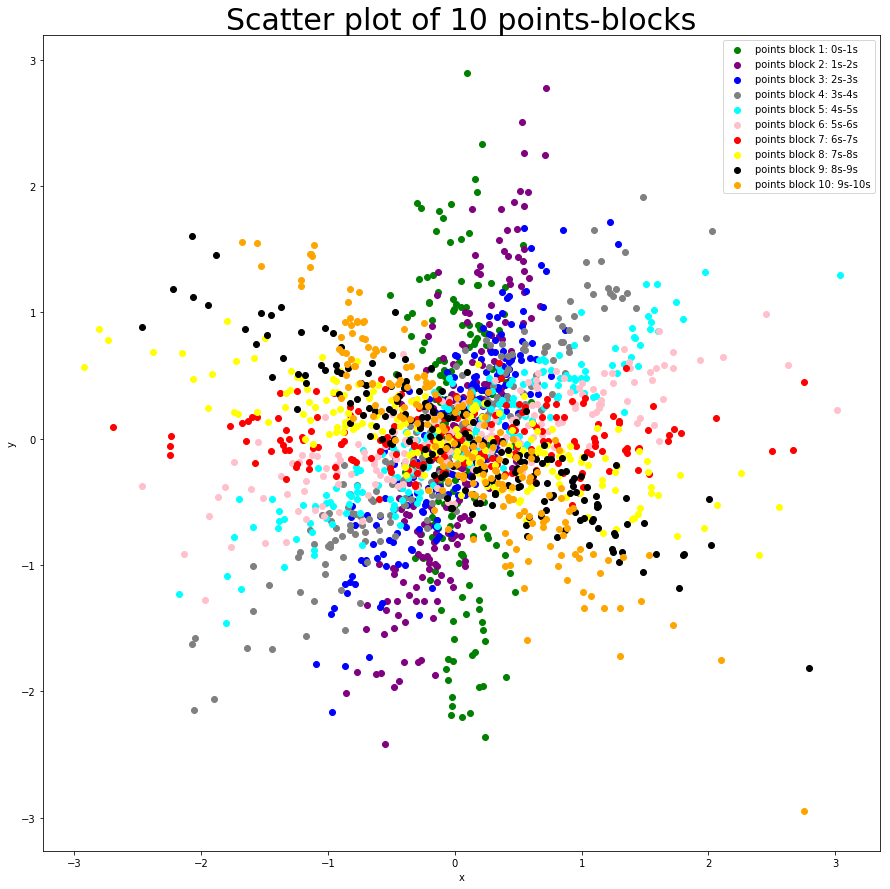

In [143]:
#Task 3.4.1
#Loading the data from .txt file
data_onlinePCA=pd.DataFrame.from_csv('data-onlinePCA.txt')
data00=data_onlinePCA.values
# Break the dataset into 10 blocks 
data01=np.zeros([200,2])
data02=np.zeros([200,2])
data03=np.zeros([200,2])
data04=np.zeros([200,2])
data05=np.zeros([200,2])
data06=np.zeros([200,2])
data07=np.zeros([200,2])
data08=np.zeros([200,2])
data09=np.zeros([200,2])
data10=np.zeros([200,2])
i=0
while i<200:
        data01[i]=data00[i]
        i=i+1
while i<400:
        data02[i-200]=data00[i]
        i=i+1
while i<600:
        data03[i-400]=data00[i]
        i=i+1
while i<800:
        data04[i-600]=data00[i]
        i=i+1
while i<1000:
        data05[i-800]=data00[i]
        i=i+1
while i<1200:
        data06[i-1000]=data00[i]
        i=i+1
while i<1400:
        data07[i-1200]=data00[i]
        i=i+1
while i<1600:
        data08[i-1400]=data00[i]
        i=i+1
while i<1800:
        data09[i-1600]=data00[i]
        i=i+1
while i<2000:
        data10[i-1800]=data00[i]
        i=i+1
#Each color indicate 1 second length of time
plt.figure(figsize=(15,15))
plt.scatter(data01[:,0],data01[:,1],label='points block 1: 0s-1s',color='green') 
plt.scatter(data02[:,0],data02[:,1],label='points block 2: 1s-2s',color='purple')
plt.scatter(data03[:,0],data03[:,1],label='points block 3: 2s-3s',color='blue')
plt.scatter(data04[:,0],data04[:,1],label='points block 4: 3s-4s',color='grey')
plt.scatter(data05[:,0],data05[:,1],label='points block 5: 4s-5s',color='cyan')
plt.scatter(data06[:,0],data06[:,1],label='points block 6: 5s-6s',color='pink')
plt.scatter(data07[:,0],data07[:,1],label='points block 7: 6s-7s',color='red')
plt.scatter(data08[:,0],data08[:,1],label='points block 8: 7s-8s',color='yellow')
plt.scatter(data09[:,0],data09[:,1],label='points block 9: 8s-9s',color='black')
plt.scatter(data10[:,0],data10[:,1],label='points block 10: 9s-10s',color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of 10 points-blocks',fontsize=30)
plt.legend()
plt.show()

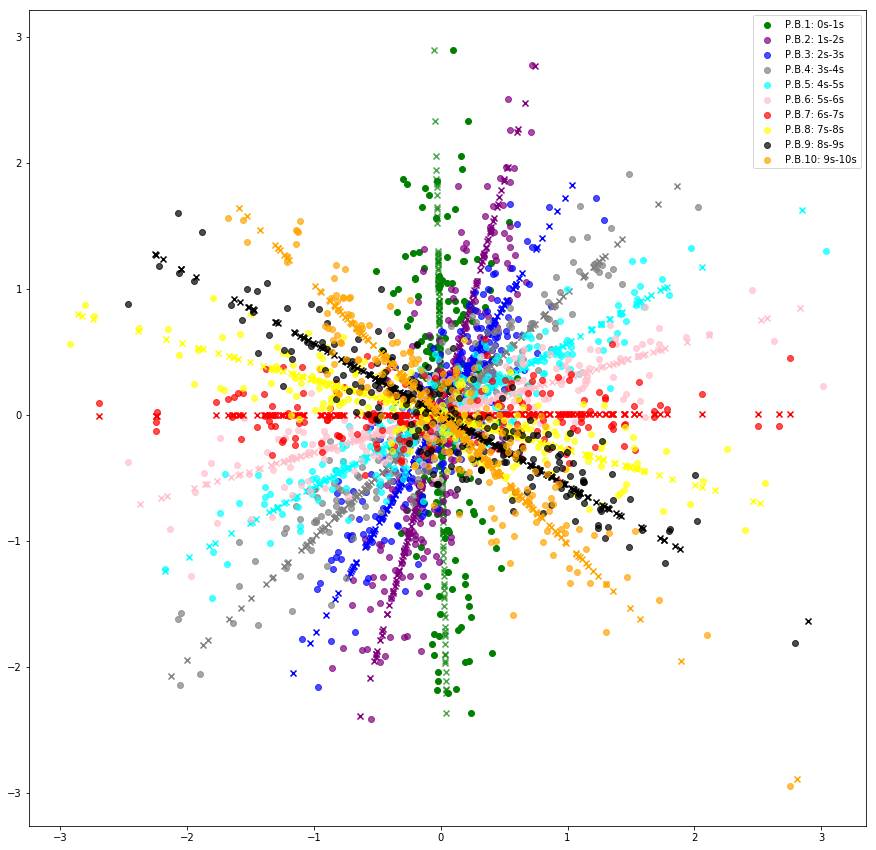

In [144]:
#Task 3.4.2
#transform the data matrix to a csv and save it for further processing
#center the data
data01_centered = data01- np.mean(data01)
# projected data
plt.figure(figsize=(15,15))
plt.scatter(data01[:,0],data01[:,1],label='P.B.1: 0s-1s',color='green',marker='o')
#Principal Component Analysis PCA
U,W,V= np.linalg.svd(data01_centered, full_matrices=True)
HAT=np.outer(V[0],V[0])
data01PCA=np.dot(data01,HAT)
#plot the first PC with together with the oringinal data
plt.scatter(*data01PCA.T,color='green',marker='x',alpha=0.7)
#repeat the same procedures for the rest point blocks
#data02
data02_centered = data02- np.mean(data02)
plt.scatter(data02[:,0],data02[:,1],label='P.B.2: 1s-2s',color='purple',marker='o',alpha=0.7)
U,W,V= np.linalg.svd(data02_centered, full_matrices=True)
HAT=np.outer(V[0],V[0])
data02PCA=np.dot(data02,HAT)
plt.scatter(*data02PCA.T,color='purple',marker='x')
#data03
data03_centered = data03- np.mean(data03)
plt.scatter(data03[:,0],data03[:,1],label='P.B.3: 2s-3s',color='blue',marker='o',alpha=0.7)
U,W,V= np.linalg.svd(data03_centered, full_matrices=True)
HAT=np.outer(V[0],V[0])
data03PCA=np.dot(data03,HAT)
plt.scatter(*data03PCA.T,color='blue',marker='x')
#data04
data04_centered = data04- np.mean(data04)
plt.scatter(data04[:,0],data04[:,1],label='P.B.4: 3s-4s',color='grey',marker='o',alpha=0.7)
U,W,V= np.linalg.svd(data04_centered, full_matrices=True)
HAT=np.outer(V[0],V[0])
data04PCA=np.dot(data04,HAT)
plt.scatter(*data04PCA.T,color='grey',marker='x')
#data05
data05_centered = data05- np.mean(data05)
plt.scatter(data05[:,0],data05[:,1],label='P.B.5: 4s-5s',color='cyan',marker='o',alpha=0.7)
U,W,V= np.linalg.svd(data05_centered, full_matrices=True)
HAT=np.outer(V[0],V[0])
data05PCA=np.dot(data05,HAT)
plt.scatter(*data05PCA.T,color='cyan',marker='x')
#data06
data06_centered = data06- np.mean(data06)
plt.scatter(data06[:,0],data06[:,1],label='P.B.6: 5s-6s',color='pink',marker='o',alpha=0.7)
U,W,V= np.linalg.svd(data06_centered, full_matrices=True)
HAT=np.outer(V[0],V[0])
data06PCA=np.dot(data06,HAT)
plt.scatter(*data06PCA.T,color='pink',marker='x')
#data07
data07_centered = data07- np.mean(data07)
plt.scatter(data07[:,0],data07[:,1],label='P.B.7: 6s-7s',color='red',marker='o',alpha=0.7)
U,W,V= np.linalg.svd(data07_centered, full_matrices=True)
HAT=np.outer(V[0],V[0])
data07PCA=np.dot(data07,HAT)
plt.scatter(*data07PCA.T,color='red',marker='x')
#data08
data08_centered = data08- np.mean(data08)
plt.scatter(data08[:,0],data08[:,1],label='P.B.8: 7s-8s',color='yellow',marker='o',alpha=0.7)
U,W,V= np.linalg.svd(data08_centered, full_matrices=True)
HAT=np.outer(V[0],V[0])
data08PCA=np.dot(data08,HAT)
plt.scatter(*data08PCA.T,color='yellow',marker='x')
#data09
data09_centered = data09- np.mean(data09)
plt.scatter(data09[:,0],data09[:,1],label='P.B.9: 8s-9s',color='black',marker='o',alpha=0.7)
U,W,V= np.linalg.svd(data09_centered, full_matrices=True)
HAT=np.outer(V[0],V[0])
data09PCA=np.dot(data09,HAT)
plt.scatter(*data09PCA.T,color='black',marker='x')
#data10
data10_centered = data10- np.mean(data10)
plt.scatter(data10[:,0],data10[:,1],label='P.B.10: 9s-10s',color='orange',marker='o',alpha=0.7)
U,W,V= np.linalg.svd(data10_centered, full_matrices=True)
HAT=np.outer(V[0],V[0])
data10PCA=np.dot(data10,HAT)
plt.scatter(*data10PCA.T,color='orange',marker='x')
plt.legend()
plt.show()

[[ 0.00134847 -0.00055566 -0.00058837 ...,  0.00103424  0.00146254
  -0.0006259 ]
 [ 0.00772692 -0.00761296  0.00241096 ...,  0.00872524  0.01779857
  -0.00856771]
 [-0.00091213  0.00480362 -0.00538286 ..., -0.00349772 -0.01040479
   0.00540328]
 ..., 
 [-0.00096095 -0.00015585  0.00113974 ..., -0.0003883   0.0001312
  -0.00017461]
 [ 0.00333428  0.00225012 -0.00618636 ...,  0.00026706 -0.00409014
   0.00252838]
 [-0.00299656 -0.00213467  0.00570659 ..., -0.00016894  0.003915
  -0.00239877]]


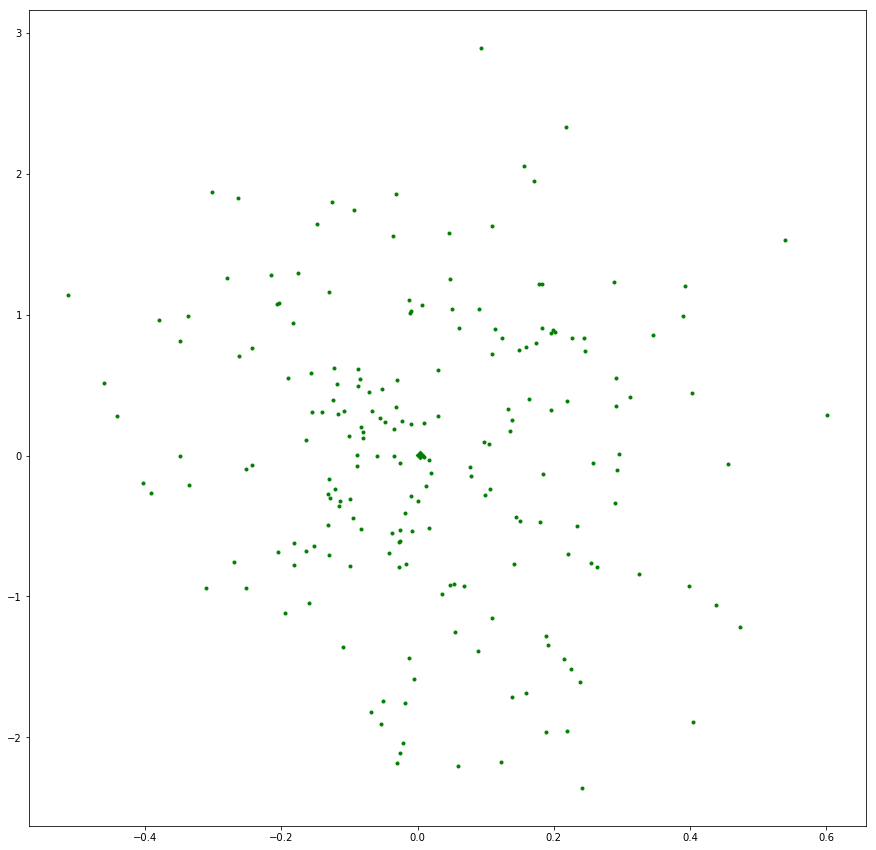

In [274]:
#Task 3.4.3
learning_rate1=0.002
#Implement Oja's rule
#data01
plt.figure(figsize=(15,15))
plt.scatter(data01[:,0],data01[:,1],label='P.B.1: 0s-1s',color='green',marker='.')
w01=data02*(mat(data01)).I
w01=w01.T
weightx_change_or=learning_rate1*data02[:,0]*(data01[:,0]-data02[:,0]*w01).T
weighty_change_or=learning_rate1*data02[:,1]*(data01[:,1]-data02[:,1]*w01).T
plt.scatter(weightx_change_or,weighty_change_or,color='green',marker='D')

